In [1]:
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def cross_entropy(t, y) :
    delta = 1e-7    # log 무한대 발산 방지
    return -np.sum(t*np.log(y+delta) + (1-t)*np.log((1-y)+delta))    

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2) 
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  cross_entropy(self.target_data, self.A3)    
    
    def errValue(self):
        return  self.feed_forward()
    
    def err_back_propa(self, input_data, target_data): # 각 입력에 대해 오차 역전파 수행
         # input_data : 784 개, target_data : 10개   
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 Loss3 구함
        Loss3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
                        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, Loss3)   
        self.b3 = self.b3 - self.learning_rate * Loss3
        
        # 은닉층 loss 인 Loss2 구함        
        Loss2 = np.dot(Loss3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, Loss2)   
        self.b2 = self.b2 - self.learning_rate * Loss2

    def train(self, training_data, epochs = 1) : 
        start_time = datetime.now()
        for epoch in range(epochs):
            print("***** Epoch #%d "%(epoch+1)+"*"*20)
            for step in range(len(training_data)):  # train
                # input_data, target_data normalize        
                target_data = np.zeros(self.output_nodes) + 0.01    
                target_data[int(training_data[step, 0])] = 0.99     # label 값의 one-hot encoding 
                input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01  # 0~255 값을 0~1의 실수로 normalize
    
                self.err_back_propa(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))
                if step % 10000 == 0:
                    print("step = %6d,"%step,  " loss_val = %.4f"% self.errValue())

        print("\nElapsed time = ", datetime.now() - start_time)

    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
    
        predicted_num = np.argmax(A3)
        return predicted_num

    def predict_for_Image(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)

        # print(np.exp(A3)/np.sum(np.exp(A3)))
        for i, a in enumerate(A3[0]):
            print("[{}]:{:.2f}".format(i, a), end='   ')
        print()
        print("Predicted Num is ", predicted_num)
    
    # 정확도 측정함수
    def accuracy(self, test_data):
        matched_list = []
        not_matched_list = []
        
        for index in range(len(test_data)):
            label = int(test_data[index, 0])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01
                  
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
        
            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
        print("Current Accuracy = ", 100*(len(matched_list)/(len(test_data))), " %")
        return len(matched_list), len(not_matched_list)
    

In [2]:
training_data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/Data/mnist_train.csv', delimiter=',', dtype=np.float32)

# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴
test_data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/Data/mnist_test.csv', delimiter=',', dtype=np.float32)
print("training_data.shape =", training_data.shape, ", test_data.shape =", test_data.shape)
print("training_data[0,0] =", training_data[0,0], ", test_data[0,0] =", test_data[0,0])

training_data.shape = (60000, 785) , test_data.shape = (10000, 785)
training_data[0,0] = 5.0 , test_data[0,0] = 7.0


In [3]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.01 # 0.05

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
epochs = 10
nn.train(training_data, epochs)

***** Epoch #1 ********************
step =      0,  loss_val = 31.9692
step =  10000,  loss_val = 10.6629
step =  20000,  loss_val = 13.4193
step =  30000,  loss_val = 14.1879
step =  40000,  loss_val = 13.9054
step =  50000,  loss_val = 15.5669
***** Epoch #2 ********************
step =      0,  loss_val = 9.6921
step =  10000,  loss_val = 12.9857
step =  20000,  loss_val = 11.9977
step =  30000,  loss_val = 14.6052
step =  40000,  loss_val = 14.9827
step =  50000,  loss_val = 15.2961
***** Epoch #3 ********************
step =      0,  loss_val = 6.0380
step =  10000,  loss_val = 13.3131
step =  20000,  loss_val = 4.5490
step =  30000,  loss_val = 15.4746
step =  40000,  loss_val = 15.8255
step =  50000,  loss_val = 14.2720
***** Epoch #4 ********************
step =      0,  loss_val = 1.7274
step =  10000,  loss_val = 13.2799
step =  20000,  loss_val = 1.1236
step =  30000,  loss_val = 15.7103
step =  40000,  loss_val = 15.7502
step =  50000,  loss_val = 13.3318
***** Epoch #5 ******

In [5]:
nn.accuracy(test_data)    # epochs에 따라 비교

Current Accuracy =  64.7  %


(6470, 3530)

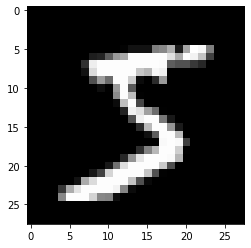

In [7]:
import matplotlib.pyplot as plt
import cv2

data = (training_data[0, 1:].reshape(28, 28))       # 학습데이터의 첫번째 예
plt.imshow(data, cmap='gray')

[0]:0.00   [1]:0.00   [2]:0.61   [3]:0.65   [4]:0.00   [5]:0.00   [6]:0.00   [7]:0.00   [8]:0.00   [9]:0.00   
Predicted Num is  3


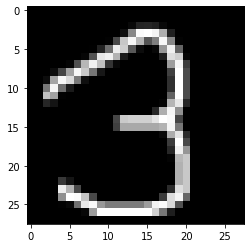

In [9]:
mat_img = cv2.imread('/content/drive/My Drive/imgs/for_test_3.png', 0)  # 0:gray  -1: origin  1: rgb
# mat_img = plt.imread('/content/drive/My Drive/imgs/for_test_2.png')  # 원본그대로 읽음
# mat_img = cv2.resize(mat_img, (28,28))
mat_img = cv2.resize(255-mat_img, (28,28))      # 밝기 역상으로
plt.imshow(mat_img, cmap='gray')    # default cmap='viridis'

im_data = mat_img.reshape(1, -1) / 255.0
# print(nn.predict(im_data))
nn.predict_for_Image(im_data)